In [1]:
import os
import pickle
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
import scipy
from Functions import renormalize, scomplex, plotting
import matplotlib.pyplot as plt
from scipy.stats import entropy as sp_entropy
import networkx as nx

plt.rcParams["text.usetex"] = True
colors = np.array(
    [
        [0.3647, 0.2824, 0.1059],
        [0.8549, 0.6314, 0.3294],
        [0.4745, 0.5843, 0.5373],
        [0.4745, 0.3843, 0.7373],
        [107.0 / 255, 42.0 / 255, 2.0 / 255],
    ]
)
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

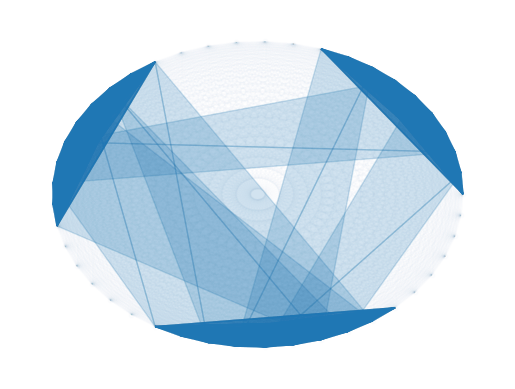

In [17]:
from itertools import combinations
N = 45
p = [1,0.001]
G = nx.complete_graph(N)
sc = {"nodes": np.reshape(np.array(G.nodes),(-1,1)), "n0":N, "edges":np.array(G.edges)}
sc["faces"]= []
for triangle in combinations(range(10),3):
    if np.random.rand() < p[0]:
        sc["faces"].append(list(triangle))


for triangle in combinations(range(15,25),3):
    if np.random.rand() < p[0]:
        sc["faces"].append(list(triangle))
    
for triangle in combinations(range(30,40),3):
    if np.random.rand() < p[0]:
        sc["faces"].append(list(triangle))

for edge1 in combinations(list(range(10)) ,2):
    for edge2 in combinations(list(range(15,25)),2):
        if np.random.rand() < p[1]:
            sc["faces"].append(np.sort([edge1[0],edge1[1],edge2[0]]))
            sc["faces"].append(np.sort([edge1[0],edge2[0],edge2[1]]))

for edge1 in combinations(list(range(15,25)) ,2):
    for edge2 in combinations(list(range(30,40)),2):
        if np.random.rand() < p[1]:
            sc["faces"].append(np.sort([edge1[0],edge1[1],edge2[0]]))
            sc["faces"].append(np.sort([edge1[0],edge2[0],edge2[1]]))

for edge1 in combinations(list(range(30,40)) ,2):
    for edge2 in combinations(list(range(10)),2):
        if np.random.rand() < p[1]:
            sc["faces"].append(np.sort([edge1[0],edge1[1],edge2[0]]))
            sc["faces"].append(np.sort([edge1[0],edge2[0],edge2[1]]))


sc["faces"] = np.unique(np.sort(np.array(sc["faces"]), axis = 1),axis = 0)


sc["n1"] = len(sc["edges"])
sc["tetrahedra"] = np.zeros((0,4))
sc["4-simplices"] = np.zeros((0,5))
sc["n2"] = sc["faces"].shape[0]
sc["n3"] = 0
sc["n4"] = 0

fig,ax = plt.subplots()
plotting.plot_complex(sc,ax,color = 'tab:blue', edge_alpha = 0.01, layout = "circle")
B1,B2,B3,B4,__,__,__ = scomplex.boundary_matrices_3(sc)

/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:303: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


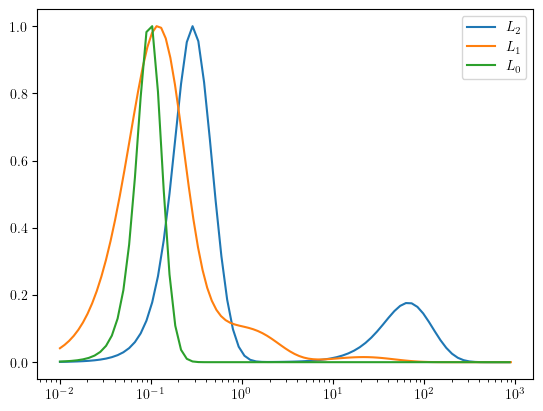

In [54]:
L2 =  B2.T@B2
L2_n = np.array(np.abs(L2 - np.diag(np.diag(L2.todense()))))
L2_n = np.diag(np.sum(L2_n, axis = 0,keepdims = 0)) - L2_n
D2,U2 = scipy.linalg.eigh(L2_n)
specific_heat, tau_space = renormalize.compute_heat(D2,-2,3,80)
plt.semilogx(tau_space,specific_heat/np.max(specific_heat))

L1d =  B1.T@B1
L1u = B2@B2.T
L1 = L1u
L1_n = np.array(np.abs(L1 - np.diag(np.diag(L1.todense()))))
# L1d_n = np.array(np.abs(L1d - np.diag(np.diag(L1d.todense()))))
# L1u_n = np.array(np.abs(L1u - np.diag(np.diag(L1u.todense()))))
# L1_n = L1d_n + L1u_n
L1_n = np.diag(np.sum(L1_n, axis = 0,keepdims = 0)) - L1_n
D1,U1 = scipy.linalg.eigh(L1_n)
specific_heat, tau_space = renormalize.compute_heat(D1,-2,3,100)
plt.semilogx(tau_space,specific_heat/np.max(specific_heat))

L0 =  B1@B1.T
D0,U0 = scipy.linalg.eigh(L0.todense())
specific_heat, tau_space = renormalize.compute_heat(D0,-2,3,80)
plt.semilogx(tau_space,specific_heat/np.max(specific_heat))

plt.legend(["$L_2$","$L_1$","$L_0$"])

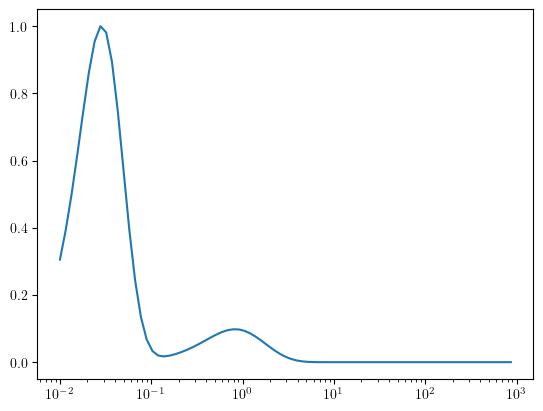

In [19]:
Lb = scomplex.laplacian_of_order(sc, 2)
Db,Ub = scipy.linalg.eigh(Lb)
specific_heat, tau_space = renormalize.compute_heat(Db,-2,3,80)
plt.semilogx(tau_space,specific_heat/np.max(specific_heat))

In [20]:
tau_space[np.argmax(specific_heat)]

0.02773562614198415

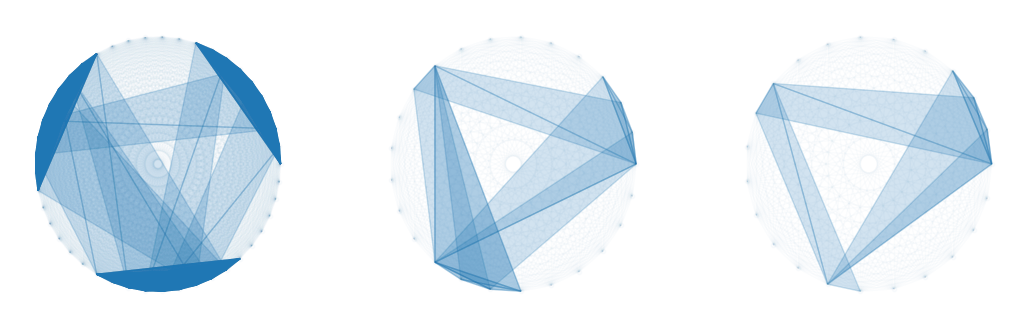

In [43]:
new_sc,__,__,__ = renormalize.renormalize_simplicial_VARIANTS(sc, order = 0,L = Lb, U = Ub, D = Db,tau = 0.07,simple = True)

nLb = scomplex.laplacian_of_order(new_sc, 2)
nDb,nUb = scipy.linalg.eigh(nLb)
new_new_sc,__,__,__ = renormalize.renormalize_simplicial_VARIANTS(sc = new_sc, order = 0, L = nLb, U = nUb, D = nDb, tau = 0.21, simple = True)

fig,axs = plt.subplots(1,3, figsize = (13,4))
plotting.plot_complex(sc,axs[0],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")
plotting.plot_complex(new_sc,axs[1],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")
plotting.plot_complex(new_new_sc,axs[2],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")



30


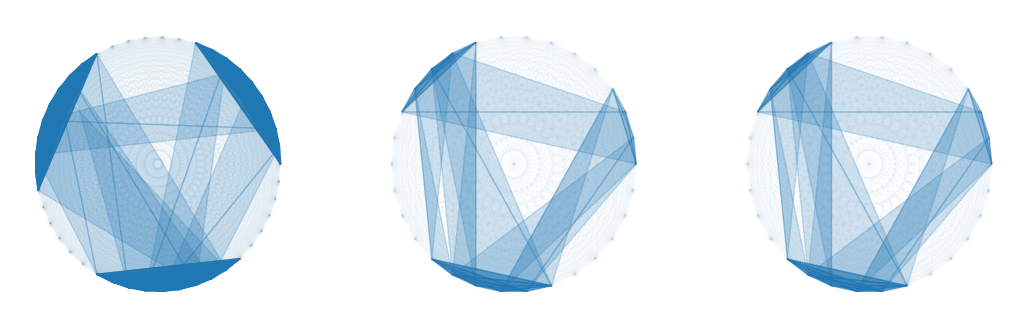

In [47]:
new_sc,__,__,__ = renormalize.renormalize_simplicial_VARIANTS(sc = sc, order = 2, L = L2, U = U2, D = D2, tau = 50, simple = True)
print(new_sc["n0"])
nB1,nB2,nB3,nB4,__,__,__ = scomplex.boundary_matrices_3(new_sc)
nL2 =  nB2.T@nB2
nL2_n = np.array(np.abs(nL2 - np.diag(np.diag(nL2.todense()))))
nL2_n = np.diag(np.sum(nL2_n, axis = 0,keepdims = 0)) - nL2_n
nD2,nU2 = scipy.linalg.eigh(nL2_n)
new_new_sc,__,__,__ = renormalize.renormalize_simplicial_VARIANTS(sc = new_sc, order = 2, L = nL2, U = nU2, D = nD2, tau = 30, simple = True)

fig,axs = plt.subplots(1,3, figsize = (13,4))
plotting.plot_complex(sc,axs[0],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")
plotting.plot_complex(new_sc,axs[1],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")
plotting.plot_complex(new_new_sc,axs[2],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")

45


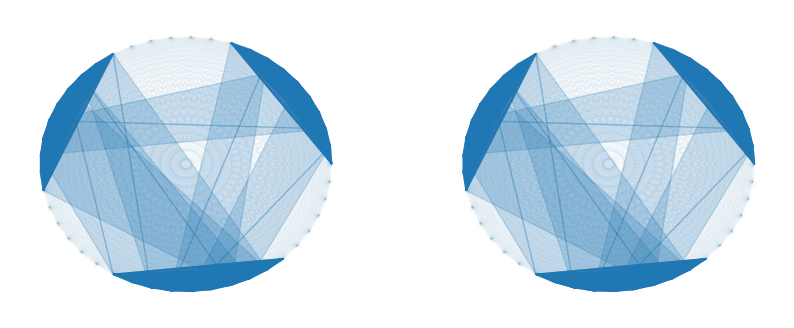

In [63]:
new_sc,__,__,__ = renormalize.renormalize_simplicial_VARIANTS(sc, order = 1,L = L1_n, U = U1, D = D1,tau = 20,simple = True)

print(new_sc["n0"])

fig,axs = plt.subplots(1,2, figsize = (10,4))
plotting.plot_complex(sc,axs[0],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")
plotting.plot_complex(new_sc,axs[1],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")


1


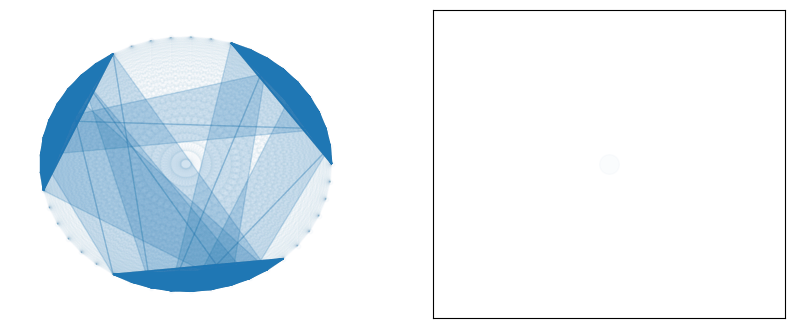

In [55]:
new_sc,__,__,__ = renormalize.renormalize_simplicial_VARIANTS(sc, order = 0,L = L0, U = U0, D = D0,tau = 1,simple = True)

print(new_sc["n0"])

fig,axs = plt.subplots(1,2, figsize = (10,4))
plotting.plot_complex(sc,axs[0],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")
plotting.plot_complex(new_sc,axs[1],color = 'tab:blue', edge_alpha = 0.02, layout = "circle")


435

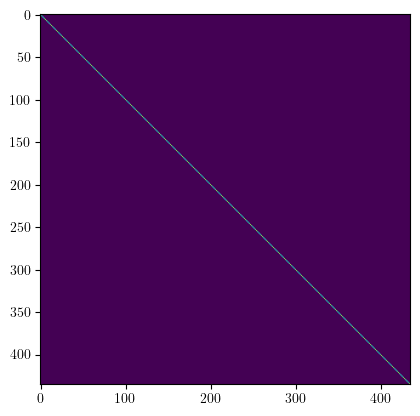

In [82]:
tau = .1
nk = sc["n1"]
Dtilde = np.zeros(nk)
for i in range(nk):
    Dtilde[i] = np.exp(-tau *D1[i])

rho = np.abs(np.triu(U1@np.diag(Dtilde)@U1.T))

zeta = np.zeros((nk, nk))
for i in range(nk):
    for j in range(i, nk):
        zeta[i, j] = (2*rho[i, j] >= rho[i, i]) or (2*rho[i, j] >= rho[j, j])

zeta = scipy.sparse.csr_matrix(zeta)

plt.imshow(zeta.todense())
ncomp, comp = scipy.sparse.csgraph.connected_components(
    zeta, directed=True, connection="weak"
    )  # Clusters assigned to the simplices
ncomp


In [107]:
L1_n

array([[32, -2, -2, ...,  0,  0,  0],
       [-2, 32, -2, ...,  0,  0,  0],
       [-2, -2, 32, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36, -2, -2],
       [ 0,  0,  0, ..., -2, 32, -2],
       [ 0,  0,  0, ..., -2, -2, 32]])

/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:304: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))


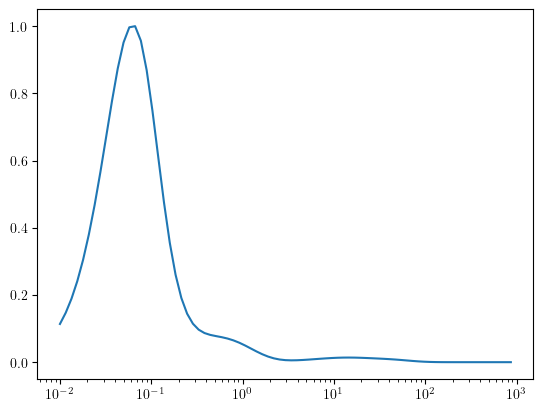

In [3]:
L1d =  B1.T@B1
L1u = B2@B2.T

L1d_n = np.array(np.abs(L1d - np.diag(np.diag(L1d.todense()))))
L1u_n = np.array(np.abs(L1u - np.diag(np.diag(L1u.todense()))))
L1_n = L1u_n+ L1u_n
L1_n = np.diag(np.sum(L1_n, axis = 0,keepdims = 0)) - L1_n
D1,U1 = scipy.linalg.eigh(L1_n)
specific_heat, tau_space = renormalize.compute_heat(D1,-2,3,80)
plt.semilogx(tau_space,specific_heat/np.max(specific_heat))

/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:303: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


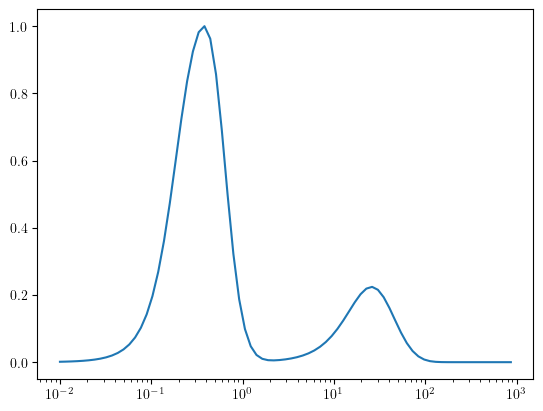

In [84]:
L2 =  B2.T@B2
L2_n = np.array(np.abs(L2 - np.diag(np.diag(L2.todense()))))
L2_n = np.diag(np.sum(L2_n, axis = 0,keepdims = 0)) - L2_n
D2,U2 = scipy.linalg.eigh(L2_n)
specific_heat, tau_space = renormalize.compute_heat(D2,-2,3,80)
plt.semilogx(tau_space,specific_heat/np.max(specific_heat))

382

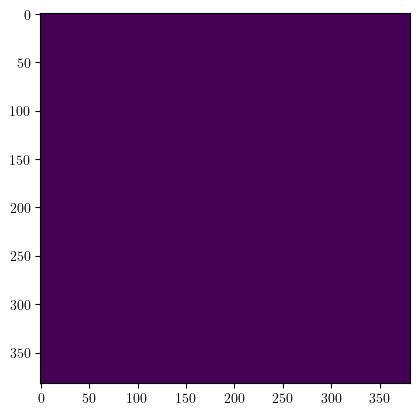

In [45]:
tau = 10

nk = sc["n2"]
rho = scipy.linalg.pinv() +np.eye(nk) - scipy.linalg.expm(-tau*L2.todense())
sas = 1+ 0*np.abs(np.sum(rho,0) )
rho = np.abs(rho)

zeta = np.zeros((nk, nk))
for i in range(nk):
    for j in range(i,nk):
        zeta[i, j] = (rho[i, j] >= rho[i, i]/sas[i]) or (rho[i, j] >= rho[j, j]/sas[i])
        #zeta[i,j] = rho[i,j] > meanrho
zeta = scipy.sparse.csr_matrix(zeta)

plt.imshow(zeta.todense())
ncomp, comp = scipy.sparse.csgraph.connected_components(
    zeta, directed=True, connection="weak"
    )  # Clusters assigned to the simplices
ncomp


In [38]:
L1 =  B1.T@B1 + B2@B2.T
D1,U1 = scipy.linalg.eigh(L1.todense())
L2 =  np.abs(B2.T@B2)
D2,U2 = scipy.linalg.eigh(L2.todense())

435

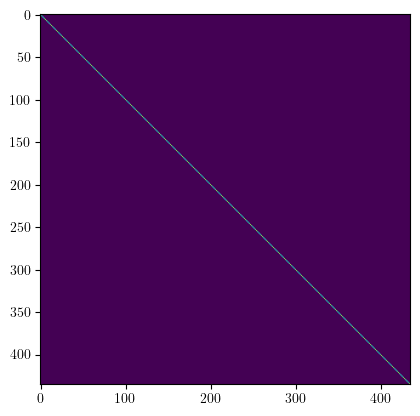

In [22]:
tau =3


nk = sc["n1"]
# Dtilde = np.zeros(nk)
# for i in range(nk):
#     Dtilde[i] = 1/np.sum(np.exp(-tau *(D1 - D1[i])))

# rho = np.abs(np.triu(U1@np.diag(Dtilde)@U1.T))
rho = scipy.linalg.expm(-tau*(L1.todense()))
#rho = np.abs(rho)
meanrho = np.sum(rho,0)

#plt.imshow(np.abs(rho))
#plt.colorbar()
zeta = np.zeros((nk, nk))
for i in range(nk):
    for j in range(i,nk):
        #zeta[i, j] = rho[i, j] > meanrho[i]
        zeta[i, j] = (rho[i, j] >= rho[i, i]) or (rho[i, j] >= rho[j, j])

zeta = scipy.sparse.csr_matrix(zeta)

plt.imshow(zeta.todense())
ncomp, comp = scipy.sparse.csgraph.connected_components(
    zeta, directed=True, connection="weak"
    )  # Clusters assigned to the simplices
ncomp


252

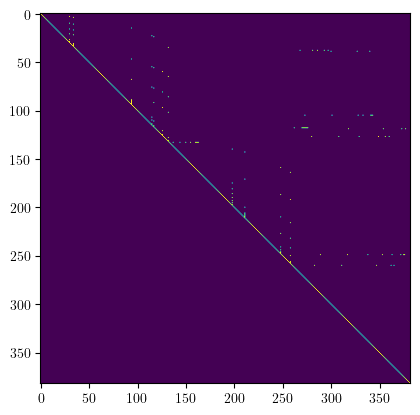

In [59]:
tau = 2

nk = sc["n2"]
rho = scipy.linalg.pinv(L2.todense())@(np.eye(nk) - scipy.linalg.expm(-tau*L2.todense()))
rho = np.abs(rho)
zeta = np.zeros((nk, nk))
for i in range(nk):
    for j in range(i,nk):
        #zeta[i, j] = rho[i, j] > meanrho[i]
        zeta[i, j] = (rho[i, j] >= rho[i, i]) or (rho[i, j] >= rho[j, j])

zeta = scipy.sparse.csr_matrix(zeta)

plt.imshow(zeta.todense())
ncomp, comp = scipy.sparse.csgraph.connected_components(
    zeta, directed=True, connection="weak"
    )  # Clusters assigned to the simplices
ncomp

In [55]:
rho = scipy.linalg.pinv(L2.todense())@(np.eye(nk) - scipy.linalg.expm(-tau*L2.todense()))
np.min(rho)

-0.6732294641577432